#Tugas Kecil 2 IF2211 Strategi Algoritma

Nama: Muhammad Rakha Athaya - NIM: 13520108 - Kelas: K03

#Import Library Utama

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

#Implementasi myConvexHull

In [55]:
class myConvexHull:
  # Konstruktor
  def __init__(self, array): # Array yang jadi input nanti adalah 'bucket' dari dataframe
    # Atribut utama
    self.S_awal = np.ndarray.tolist(array) # Menyimpan himpunan titik awal
    self.S_sorted = self.S_awal # Menyimpan himpunan titik yang terurut 
    self.simplices = [] # Menyimpan indeks garis yang membentuk convex hull
    # Pemanggilan Metode Utama
    if (len(list(set(tuple(point) for point in self.S_awal))) > 1):
      # Convex hull tidak bisa dibuat jika hanya ada 1 titik unik
      self.convexHullUtama()      

 ## Metode Utama

  def convexHullUtama(self):
    self.sort_S()
    # Mencari 2 titik ekstrim awal, p1 dan pn
    p1 = self.S_sorted[0]
    pn = self.S_sorted[len(self.S_sorted) - 1]
    # Membagi titik-titik himpunan S_sorted ke dalam dua grup,
    # Di atas (kiri) garis dan di bawah (kanan) garis p1pn
    S1, S2 = self.devide_S(p1, pn, self.S_sorted)
    # Mencari convex hull grup atas (kiri)
    self.convexHullRekursif(p1, pn, S1, 1)
    # Mencari convex hull grup bawah (kanan)
    self.convexHullRekursif(p1, pn, S2, 2)

  def convexHullRekursif(self, p1, pn, S, tipe):
    if (len(S) == 0): # Basis
      # Bila himpunan S kosong, maka p1pn adalah sisi convex hull
      # Masukkan p1 dan pn ke simplices dan setOfConvexHull 
      idx_p1 = self.get_IdxPoint(p1)
      idx_pn = self.get_IdxPoint(pn)
      self.simplices.append([idx_p1, idx_pn])
      #self.setOfConvexHull.append([p1, pn])
    else: # Rekurens
      # Mencari titik terjauh dari garis p1pn
      pmax = self.maxPoint(p1, pn, S)
      if tipe == 1: # Untuk titik-titik di bagian atas
        # Memasukkan titik-titik di sebelah kiri atas garis p1pmax ke kelompok S1_1
        S1_1,_ = self.devide_S(p1, pmax, S)
        # Memasukkan titik-titik di sebelah kanan atas garis pmaxpn ke kelompok S1_2
        S1_2,_ = self.devide_S(pmax, pn, S)
        # Panggil kembali metode convex hull kiri untuk kedua kelompok tersebut
        self.convexHullRekursif(p1, pmax, S1_1, 1)
        self.convexHullRekursif(pmax, pn, S1_2, 1)
      else: # tipe == 2 untuk titik-titik di sebelah bawah
        # Memasukkan titik-titik di sebelah kiri bawah garis p1pmax ke kelompok S1_1
        _,S1_1 = self.devide_S(p1, pmax, S)
        # Memasukkan titik-titik di sebelah kanan bawah garis pmaxpn ke kelompok S1_2
        _,S1_2 = self.devide_S(pmax, pn, S)
         # Panggil kembali metode convex hull kanan untuk kedua kelompok tersebut
        self.convexHullRekursif(p1, pmax, S1_1, 2)
        self.convexHullRekursif(pmax, pn, S1_2, 2)       

  ## Metode Pembantu
  
  def get_IdxPoint(self, point):
    # Mendapatkan indeks titik dalam S_awal
    for i in range(len(self.S_awal)):
      if (self.S_awal[i] == point): return i

  def sort_S(self):
    # Mengurutkan titik-titik dalam S_sorted agar mudah menentukan titik ekstrim awal
    x_sorted = sorted(self.S_sorted, key=lambda x: x[1]) # Urutkan absis menaik
    y_sorted = sorted(x_sorted, key=lambda x: x[0]) # Jika absis sama, urutkan ordinat menaik
    self.S_sorted = y_sorted

  def maxPoint(self, p1, pn, S):
    # Mencari titik paling jauh dari garis p1pn
    max_point = S[0]
    jarakMax = 0
    for i in S:
      # Mencari jarak titik i ke garis p1pn
      # Referensi rumus: https://math.stackexchange.com/q/2757330
      mutlak = abs((pn[0]-p1[0])*(p1[1]-i[1]) - (p1[0]-i[0])*(pn[1]-p1[1]))
      akar = (((pn[0]-p1[0])**2 + (pn[1]-p1[1])**2)**(0.5))
      jarak =  mutlak / akar
      if (jarak > jarakMax):
        jarakMax = jarak
        max_point = i
    return max_point

  def devide_S(self, p1, pn, S):
    # Membagi titik-titik dalam S ke dalam dua grup berdasarkan posisinya terhadap garis p1pn
    S1 = [] # Himpunan titik di kiri atas garis
    S2 = [] # Himpunan titik di kanan bawah garis
    for p3 in S:
      if ((p3 != p1) and (p3 != pn)):
        # Menentukan determinan dari titik p1, pn, dan p3
        # Referensi rumus: https://informatika.stei.itb.ac.id/~rinaldi.munir/Stmik/2021-2022/
        #                  Algoritma-Divide-and-Conquer-(2022)-Bagian4.pdf
        det = (p1[0]*pn[1] + p3[0]*p1[1] + p3[1]*pn[0] - p3[0]*pn[1] - pn[0]*p1[1] - p1[0]*p3[1])
        # Menambahkan titik ke S1 atau S2
        if det > 0: S1.append(p3) # Determinan positif artinya titik berada di kiri atas garis
        elif det < 0: S2.append(p3) # Determinan positif artinya titik berada di kanan atas garis
        # Determinan 0 artinya titik berada di garis, diabaikan
    return S1, S2

#Visualisasi Tes Linear Separability Dataset

In [58]:
def printConvexHull(df, x, y):
  plt.figure(figsize = (10, 6))
  colors = ['b','r','g']
  plt.title(data.feature_names[x] + " vs " + data.feature_names[y])
  plt.xlabel(data.feature_names[x])
  plt.ylabel(data.feature_names[y])
  for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[x,y]].values
    hull = myConvexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull.simplices:
      plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
  plt.legend()

#Test dengan Beberapa Dataset

##Iris Plants Dataset

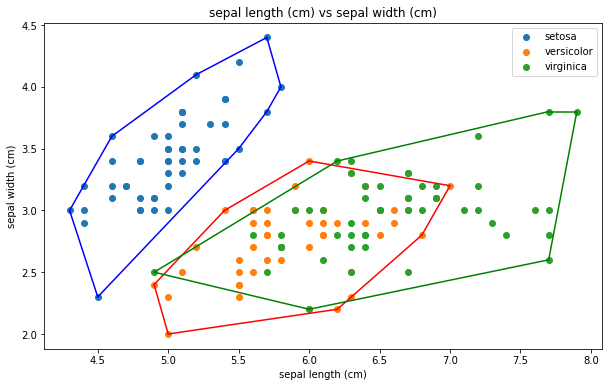

In [68]:
data = datasets.load_iris() 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
printConvexHull(df, 0, 1)

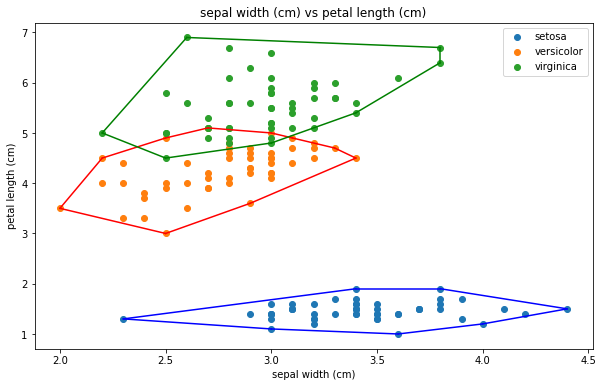

In [69]:
data = datasets.load_iris() 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
printConvexHull(df, 1, 2) 

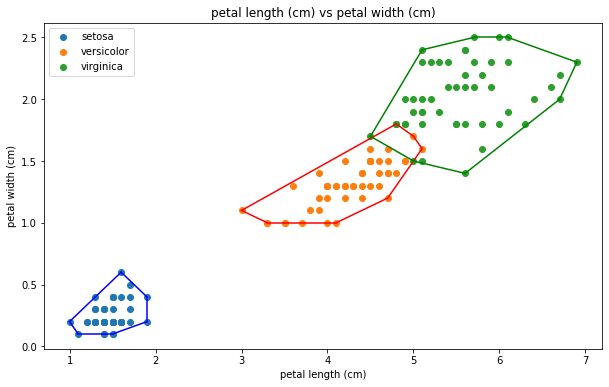

In [70]:
data = datasets.load_iris() 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
printConvexHull(df, 2, 3) 

##Breast Cancer Wisconsin Dataset

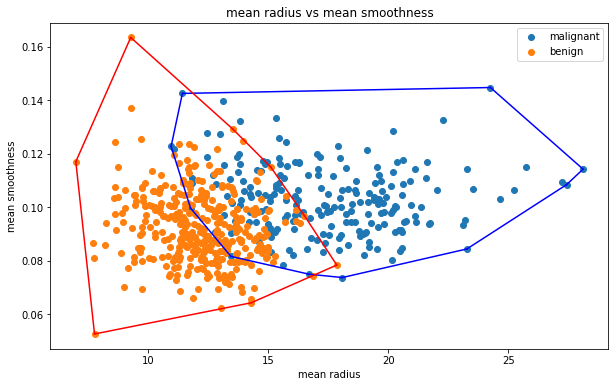

In [78]:
data = datasets.load_breast_cancer() 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
printConvexHull(df, 0, 4) 

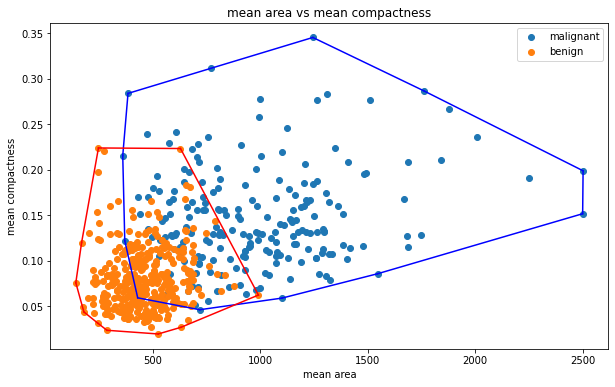

In [80]:
data = datasets.load_breast_cancer() 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
printConvexHull(df, 3, 5) 

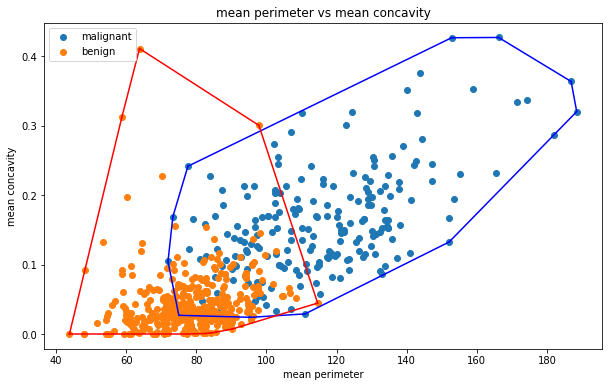

In [82]:
data = datasets.load_breast_cancer() 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
printConvexHull(df, 2, 6) 

##Wine Recognition Dataset

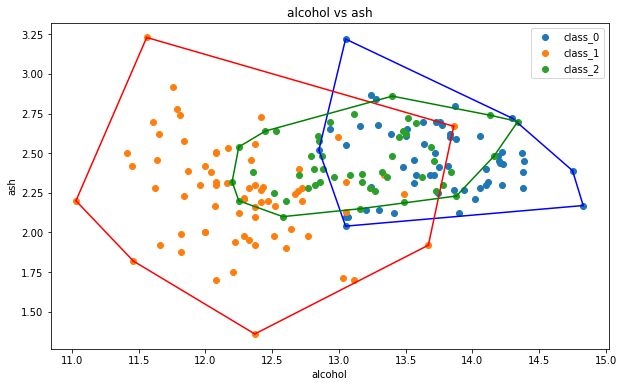

In [86]:
data = datasets.load_wine() 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
printConvexHull(df, 0, 2) 

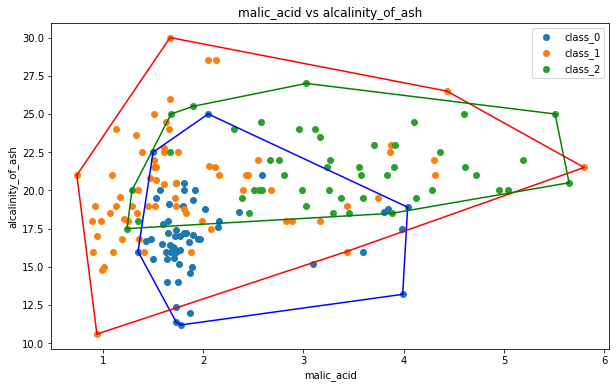

In [88]:
data = datasets.load_wine() 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
printConvexHull(df, 1, 3)

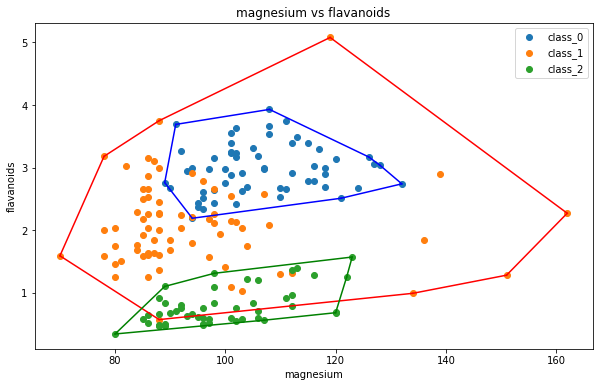

In [89]:
data = datasets.load_wine() 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
printConvexHull(df, 4, 6)